Comp 388/487 - Project 1


Team-3
Monica Sieklucki (msieklucki), John Mikos (jmikos), Bhargvi Handa (bhanda)

In [1]:
!pip install python-mnist
import tensorflow as tf
import pandas as pd
import keras
import numpy as np

from keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten,AveragePooling2D, MaxPooling2D, GlobalAveragePooling2D,Dropout

# Data source for the EMNIST dataset which we will need to unzip
!wget https://www.itl.nist.gov/iaui/vip/cs_links/EMNIST/gzip.zip --no-check-certificate

--2022-03-24 23:22:58--  https://www.itl.nist.gov/iaui/vip/cs_links/EMNIST/gzip.zip
Resolving www.itl.nist.gov (www.itl.nist.gov)... 129.6.13.19, 2610:20:6005:13::19
Connecting to www.itl.nist.gov (www.itl.nist.gov)|129.6.13.19|:443... connected.
  Issued certificate has expired.
HTTP request sent, awaiting response... 200 OK
Length: 561753746 (536M) [application/zip]
Saving to: ‘gzip.zip’

gzip.zip            100%[===================>] 535.73M  16.5MB/s    in 34s     

2022-03-24 23:23:33 (15.7 MB/s) - ‘gzip.zip’ saved [561753746/561753746]



In [2]:
# Update .zip + .# based on what was installed above
!unzip -qq ./gzip.zip

In [3]:
!mv gzip data
# we will only use test as total dataset is EMNIST ByClass: 814,255 characters. 62 unbalanced classes
# If you use local machine that has more ram > ~12 gb
# !gunzip ./data/emnist-byclass-train-images-idx3-ubyte.gz 
# !gunzip ./data/emnist-byclass-train-labels-idx1-ubyte.gz
!gunzip ./data/emnist-byclass-test-images-idx3-ubyte.gz 
!gunzip ./data/emnist-byclass-test-labels-idx1-ubyte.gz

mnist X train shape: (77936, 28, 28, 1)
mnist X test shape: (38387, 28, 28, 1)
mnist y train shape: (77936, 62)
mnist y test shape: (38387, 62)


"\n# Images in folder data\nmndata = MNIST('data')\n\n# This will load emnist dataset\n# emnist_x_train, emnist_y_train = mndata.load('./data/emnist-byclass-train-images-idx3-ubyte', './data/emnist-byclass-train-labels-idx1-ubyte')\n# Removing test as runtime cant handle both\nemnist_x_test, emnist_y_test = mndata.load('./data/emnist-byclass-test-images-idx3-ubyte', './data/emnist-byclass-test-labels-idx1-ubyte')\n\nprint(type(emnist_x_test))\nprint(type(emnist_x_test[0]))\n\n# Convert data to numpy arrays and normalize images to the interval [0, 1]\nRun time on colab cant run both\nn_elem = len(emnist_x_train)\nemnist_x_train = np.array(emnist_x_train).reshape(n_elem,28,28).transpose(0,2,1).reshape(n_elem,28**2) / 255.0\nemnist_y_train = np.array(emnist_y_train)\n\nn_elem = len(emnist_x_test)\nemnist_x_test = np.array(emnist_x_test).reshape(n_elem,28,28).transpose(0,2,1).reshape(n_elem,28**2) / 255.0\nemnist_y_test = np.array(emnist_y_test)\n\nfrom matplotlib import pyplot as plt\nplt

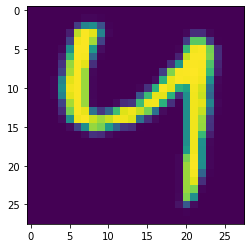

In [4]:
# modified from: https://github.com/MatchLab-Imperial/deep-learning-course/blob/master/06_Autoencoders.ipynb
from mnist import MNIST
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

mndata = MNIST('data')

# This will load emnist dataset
#emnist_x_train, emnist_y_train = mndata.load('./data/emnist-byclass-train-images-idx3-ubyte', './data/emnist-byclass-train-labels-idx1-ubyte')
# Removing test as runtime cant handle both
X, y = mndata.load('./data/emnist-byclass-test-images-idx3-ubyte', './data/emnist-byclass-test-labels-idx1-ubyte')

emnist_x_train, emnist_x_test, emnist_y_train, emnist_y_test = train_test_split(X, y, test_size=0.33, random_state=42)
# Convert data to numpy arrays and normalize images to the interval [0, 1]
emnist_x_train = np.array(emnist_x_train) / 255.0
emnist_y_train = np.array(emnist_y_train)
emnist_x_test = np.array(emnist_x_test) / 255.0
emnist_y_test = np.array(emnist_y_test)

#Reshaping all images into 28*28 for pre-processing
emnist_x_train = emnist_x_train.reshape(emnist_x_train.shape[0], 28, 28, 1)
emnist_x_test = emnist_x_test.reshape(emnist_x_test.shape[0], 28, 28, 1)


emnist_y_train = to_categorical(emnist_y_train, 62)
emnist_y_test = to_categorical(emnist_y_test, 62)

#Print train and test shape
print("mnist X train shape: " + str(emnist_x_train.shape))
print("mnist X test shape: " + str(emnist_x_test.shape))

print("mnist y train shape: " + str(emnist_y_train.shape))
print("mnist y test shape: " + str(emnist_y_test.shape))

#Display a random image
from matplotlib import pyplot as plt
plt.imshow(emnist_x_train[10].reshape(28,28))
plt.show

Now to try CNN models!

In [9]:
#Print train and test shape
print("mnist X train shape: " + str(emnist_x_train.shape))
print("mnist X test shape: " + str(emnist_x_test.shape))

print("mnist y train shape: " + str(emnist_y_train.shape))
print("mnist y test shape: " + str(emnist_y_test.shape))

mnist X train shape: (77936, 28, 28, 1)
mnist X test shape: (38387, 28, 28, 1)
mnist y train shape: (77936, 62)
mnist y test shape: (38387, 62)


LeNet5

In [7]:
#create model
lenet5 = tf.keras.models.Sequential([
            tf.keras.layers.Conv2D(filters=6, kernel_size=(3,3), activation="relu", input_shape=(28, 28, 1)),
            tf.keras.layers.AveragePooling2D(pool_size=(2,2), strides=2),
            tf.keras.layers.Conv2D(filters=16, kernel_size=(3,3), activation="relu", input_shape=(28, 28, 1)),
            tf.keras.layers.AveragePooling2D(pool_size=(2,2), strides=2),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(120, activation='sigmoid'),
            tf.keras.layers.Dense(84, activation='sigmoid'),
            tf.keras.layers.Dense(62, activation="softmax")])

'\nlenet5 = tf.keras.models.Sequential()\n#add model layers\nlenet5.add(Conv2D(filters=6, kernel_size=(3,3)), activation="relu", input_shape=(28, 28, 1))\nlenet5.add(AveragePooling2D(pool_size=(2,2), strides=2))\nlenet5.add(Conv2D(filters=16, kernel_size=(3,3), activation="relu", input_shape=(28, 28, 1)))\nlenet5.add(AveragePooling2D(pool_size=(2,2), strides=2))\nlenet5.add(Flatten())\nlenet5.add(Dense(120, activation=\'sigmoid\'))\nlenet5.add(Dense(84, activation=\'sigmoid\'))\nlenet5.add(Dense(47, activation="softmax"))\n'

In [8]:
# compile model using accuracy to measure model performance
lenet5.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# train the model
lenet5.fit(emnist_x_train, emnist_y_train, epochs=25, batch_size=128)
# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = lenet5.evaluate(emnist_x_test, emnist_y_test, batch_size=128)
print("test loss, test acc:", results)

Epoch 1/25
609/609 [==============================] - 14s 7ms/step - loss: 2.1233 - accuracy: 0.4979
Epoch 2/25
609/609 [==============================] - 4s 7ms/step - loss: 1.0160 - accuracy: 0.7167
Epoch 3/25
609/609 [==============================] - 4s 6ms/step - loss: 0.7729 - accuracy: 0.7664
Epoch 4/25
609/609 [==============================] - 4s 6ms/step - loss: 0.6758 - accuracy: 0.7878
Epoch 5/25
609/609 [==============================] - 4s 6ms/step - loss: 0.6202 - accuracy: 0.8011
Epoch 6/25
609/609 [==============================] - 4s 6ms/step - loss: 0.5804 - accuracy: 0.8099
Epoch 7/25
609/609 [==============================] - 4s 6ms/step - loss: 0.5520 - accuracy: 0.8165
Epoch 8/25
609/609 [==============================] - 4s 6ms/step - loss: 0.5286 - accuracy: 0.8230
Epoch 9/25
609/609 [==============================] - 4s 6ms/step - loss: 0.5077 - accuracy: 0.8277
Epoch 10/25
609/609 [==============================] - 4s 7ms/step - loss: 0.4926 - accuracy: 0.832

AlexNet

In [10]:
#create model
alexnet = Sequential()
#add model layers
alexnet.add(Conv2D(96, kernel_size=(5,5), activation="relu", input_shape=(28, 28, 1)))
alexnet.add(MaxPooling2D(pool_size=(2,2), strides=2))
alexnet.add(Conv2D(256, kernel_size=(5,5), padding="same", activation="relu"))
alexnet.add(MaxPooling2D(pool_size=(2,2), strides=2))
alexnet.add(Conv2D(384, kernel_size=(3,3), padding="same", activation="relu"))
alexnet.add(Conv2D(384, kernel_size=(3,3), padding="same", activation="relu"))
alexnet.add(Conv2D(256, kernel_size=(3,3), padding="same", activation="relu"))
alexnet.add(MaxPooling2D(pool_size=(2,2), strides=2))
alexnet.add(Flatten())
alexnet.add(Dense(120, activation='relu'))
alexnet.add(Dropout(0.5))
alexnet.add(Dense(84, activation='relu'))
alexnet.add(Dropout(0.5))
alexnet.add(Dense(62, activation="softmax"))

In [11]:
# compile model using accuracy to measure model performance
alexnet.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# train the model
alexnet.fit(emnist_x_train, emnist_y_train, epochs=25, batch_size=128)

# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = alexnet.evaluate(emnist_x_test, emnist_y_test, batch_size=128)
print("test loss, test acc:", results)

Epoch 1/25
609/609 [==============================] - 39s 59ms/step - loss: 2.2656 - accuracy: 0.4104
Epoch 2/25
609/609 [==============================] - 35s 58ms/step - loss: 1.1165 - accuracy: 0.6664
Epoch 3/25
609/609 [==============================] - 36s 58ms/step - loss: 0.8734 - accuracy: 0.7277
Epoch 4/25
609/609 [==============================] - 35s 58ms/step - loss: 0.7480 - accuracy: 0.7595
Epoch 5/25
609/609 [==============================] - 37s 61ms/step - loss: 0.6663 - accuracy: 0.7778
Epoch 6/25
609/609 [==============================] - 35s 58ms/step - loss: 0.6244 - accuracy: 0.7920
Epoch 7/25
609/609 [==============================] - 35s 58ms/step - loss: 0.5798 - accuracy: 0.8040
Epoch 8/25
609/609 [==============================] - 35s 58ms/step - loss: 0.5443 - accuracy: 0.8131
Epoch 9/25
609/609 [==============================] - 35s 58ms/step - loss: 0.5169 - accuracy: 0.8206
Epoch 10/25
609/609 [==============================] - 36s 59ms/step - loss: 0.487

In [12]:
results = alexnet.evaluate(emnist_x_test, emnist_y_test, batch_size=128)

300/300 [==============================] - 6s 21ms/step - loss: 0.5754 - accuracy: 0.8500


VGG 16

In [13]:
#create model
vgg16 = Sequential()
#add model layers
vgg16.add(Conv2D(96, kernel_size=(5,5), activation="relu", input_shape=(28, 28, 1)))
vgg16.add(MaxPooling2D(pool_size=(2,2), strides=2))
vgg16.add(Conv2D(256, kernel_size=(5,5), padding="same", activation="relu"))
vgg16.add(MaxPooling2D(pool_size=(2,2), strides=2))
vgg16.add(Conv2D(384, kernel_size=(3,3), padding="same", activation="relu"))
vgg16.add(Conv2D(384, kernel_size=(3,3), padding="same", activation="relu"))
vgg16.add(Conv2D(256, kernel_size=(3,3), padding="same", activation="relu"))
vgg16.add(MaxPooling2D(pool_size=(2,2), strides=2))
vgg16.add(Flatten())
vgg16.add(Dense(120, activation='relu'))
vgg16.add(Dropout(0.5))
vgg16.add(Dense(84, activation='relu'))
vgg16.add(Dropout(0.5))
vgg16.add(Dense(62, activation="softmax"))

In [14]:
# compile model using accuracy to measure model performance
vgg16.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# train the model
vgg16.fit(emnist_x_train, emnist_y_train, epochs=25, batch_size=128)

# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = vgg16.evaluate(emnist_x_test, emnist_y_test, batch_size=128)
print("test loss, test acc:", results)

Epoch 1/25
609/609 [==============================] - 36s 58ms/step - loss: 2.0426 - accuracy: 0.4685
Epoch 2/25
609/609 [==============================] - 35s 58ms/step - loss: 1.0108 - accuracy: 0.6945
Epoch 3/25
609/609 [==============================] - 35s 57ms/step - loss: 0.8022 - accuracy: 0.7459
Epoch 4/25
609/609 [==============================] - 35s 57ms/step - loss: 0.7064 - accuracy: 0.7690
Epoch 5/25
609/609 [==============================] - 35s 57ms/step - loss: 0.6454 - accuracy: 0.7857
Epoch 6/25
609/609 [==============================] - 35s 57ms/step - loss: 0.5850 - accuracy: 0.8017
Epoch 7/25
609/609 [==============================] - 35s 57ms/step - loss: 0.5466 - accuracy: 0.8106
Epoch 8/25
609/609 [==============================] - 35s 57ms/step - loss: 0.5186 - accuracy: 0.8195
Epoch 9/25
609/609 [==============================] - 35s 57ms/step - loss: 0.4905 - accuracy: 0.8266
Epoch 10/25
609/609 [==============================] - 36s 58ms/step - loss: 0.470

License Plate - Expanding/Using this project


This would be next step of process. What would need to be done is to create letters or digits that are of size 28x28. Can use programs like detecto to create bounding boxes/find shapes and then from there do one at a time but keep order consistent. This is beyond scope of this project but we still showcase the real world application
 ---
Dataset + sample code for detecto here:
https://www.kaggle.com/francescopettini/license-plate-characters-detection-ocr